# Overfitting, Underfitting
- https://www.tensorflow.org/tutorials/keras/overfit_and_underfit?hl=ko


- Overfitting(과대적합): 훈련 세트에서 높은 성능을 얻을 수 있으나, 테스트 세트에 일반화되지 않는 것
    - 테스트 세트: 이전에 본 적이 없는 데이터
    - 방안
        1. 더 많은 훈련 데이터를 사용하는 것
            - 일반적으로 많은 데이터에서 훈련한 모델은 자연적으로 일반화 성능이 좋다고 알려짐
        2. 규제(regularization)와 같은 기법 사용
            - 모델이 저장할 수 있는 정보의 양과 종류에 제약을 부과하는 방법
            - 최적화 과정 동안 일반화 가능성이 가장 높은 중요한 패턴에 초점을 맞추는 것
            
            
- Underfitting(과소적합): 네트워크가 훈련 세트에서 적절한 패턴을 학습하지 못함
    - 원인
        1. 모델이 너무 단순함
        2. 규제가 너무 많음
        3. 충분히 오래 훈련하지 않은 경우
        

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [3]:
NUM_WORDS = 1000
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow_core/python/keras/datasets/imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow_core/python/keras/datasets/imdb.py:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [8]:
def multi_hot_sequences(sequences, dimension):
    """
    멀티-핫 인코딩 -> 정수 시퀀스를 0과 1로 이루어진 벡터로 변환함
    """
    results = np.zeros((len(sequences),dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results

In [9]:
train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

In [10]:
train_data.shape

(25000, 1000)

In [11]:
train_data

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

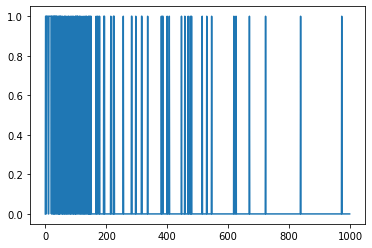

In [12]:
plt.plot(train_data[0])

## 과대적합 방지
- 모델의 규모를 축소하는 것
    - 모델에 있는 학습 가능한 파라미터 수를 줄임
        - 모델 파라미터는 layer개수와 층의 unit개수에 의해 결정됨
        
        
- 모델의 학습 가능한 파라미터 수 = 모델의 "용량" (딥러닝에서 사용하는 개념)
    - 많은 파라미터 = 더 많은 "기억 용량" --> 훈련 샘플과 타깃 사이를 일반화 능력이 없는 딕셔너리와 같은 매핑으로 완벽하게 학습 가능 but 본적 없는 데이터를 예측할 땐 쓸모 없음
    
  
- 딥러닝 모델이 해결할 문제 != 학습 // **딥러닝 모델이 해결할 문제 = 일반화**
    - 일반화를 위해서 "너무 많은 기억 용량"과 "충분하지 않은 기억 용량" 사이의 균형이 필요함
    - 위와 같은 균형을 결정하는 공식이 없음 --> 여러 가지 다른 구조를 사용해 실험해야됨
    - 알맞은 모델의 크기를 찾으려면 비교적 적은 수의 층과 파라미터로 시작해서 검증 손실이 감소할 때까지 새로운 층을 추가하거나 층의 크기를 늘리는 것이 좋음

### 기준 모델

In [14]:
from tensorflow.keras.layers import Dense
baseline_model = keras.Sequential([
    Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                16016     
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [15]:
baseline_history = baseline_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 1s - loss: 0.6529 - accuracy: 0.5609 - binary_crossentropy: 0.6529 - val_loss: 0.5914 - val_accuracy: 0.6856 - val_binary_crossentropy: 0.5914
Epoch 2/20
25000/25000 - 0s - loss: 0.5417 - accuracy: 0.7644 - binary_crossentropy: 0.5417 - val_loss: 0.5064 - val_accuracy: 0.8159 - val_binary_crossentropy: 0.5064
Epoch 3/20
25000/25000 - 0s - loss: 0.4496 - accuracy: 0.8488 - binary_crossentropy: 0.4496 - val_loss: 0.3823 - val_accuracy: 0.8531 - val_binary_crossentropy: 0.3823
Epoch 4/20
25000/25000 - 0s - loss: 0.3363 - accuracy: 0.8656 - binary_crossentropy: 0.3363 - val_loss: 0.3370 - val_accuracy: 0.8577 - val_binary_crossentropy: 0.3370
Epoch 5/20
25000/25000 - 0s - loss: 0.3114 - accuracy: 0.8751 - binary_crossentropy: 0.3114 - val_loss: 0.3299 - val_accuracy: 0.8610 - val_binary_crossentropy: 0.3299
Epoch 6/20
25000/25000 - 0s - loss: 0.2980 - accuracy: 0.8792 - binary_crossentropy: 0.2980 - val_loss: 0.3300

### 작은 모델

In [16]:
smaller_model = keras.Sequential([
    Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 4004      
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [17]:
smaller_history = smaller_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 1s - loss: 0.6650 - accuracy: 0.5734 - binary_crossentropy: 0.6650 - val_loss: 0.6143 - val_accuracy: 0.6860 - val_binary_crossentropy: 0.6143
Epoch 2/20
25000/25000 - 0s - loss: 0.5222 - accuracy: 0.7850 - binary_crossentropy: 0.5222 - val_loss: 0.4347 - val_accuracy: 0.8304 - val_binary_crossentropy: 0.4347
Epoch 3/20
25000/25000 - 0s - loss: 0.3836 - accuracy: 0.8504 - binary_crossentropy: 0.3836 - val_loss: 0.3634 - val_accuracy: 0.8528 - val_binary_crossentropy: 0.3634
Epoch 4/20
25000/25000 - 0s - loss: 0.3373 - accuracy: 0.8650 - binary_crossentropy: 0.3373 - val_loss: 0.3423 - val_accuracy: 0.8577 - val_binary_crossentropy: 0.3423
Epoch 5/20
25000/25000 - 0s - loss: 0.3195 - accuracy: 0.8702 - binary_crossentropy: 0.3195 - val_loss: 0.3325 - val_accuracy: 0.8607 - val_binary_crossentropy: 0.3325
Epoch 6/20
25000/25000 - 0s - loss: 0.3104 - accuracy: 0.8732 - binary_crossentropy: 0.3104 - val_loss: 0.3296

### 큰 모델

In [18]:
bigger_model = keras.Sequential([
    Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy', 'binary_crossentropy'])

bigger_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               512512    
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [19]:
bigger_history = bigger_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 1s - loss: 0.4188 - accuracy: 0.8053 - binary_crossentropy: 0.4188 - val_loss: 0.3298 - val_accuracy: 0.8598 - val_binary_crossentropy: 0.3298
Epoch 2/20
25000/25000 - 1s - loss: 0.2902 - accuracy: 0.8806 - binary_crossentropy: 0.2902 - val_loss: 0.3229 - val_accuracy: 0.8597 - val_binary_crossentropy: 0.3229
Epoch 3/20
25000/25000 - 1s - loss: 0.2303 - accuracy: 0.9080 - binary_crossentropy: 0.2303 - val_loss: 0.3352 - val_accuracy: 0.8573 - val_binary_crossentropy: 0.3352
Epoch 4/20
25000/25000 - 1s - loss: 0.1200 - accuracy: 0.9608 - binary_crossentropy: 0.1200 - val_loss: 0.4034 - val_accuracy: 0.8491 - val_binary_crossentropy: 0.4034
Epoch 5/20
25000/25000 - 1s - loss: 0.0313 - accuracy: 0.9944 - binary_crossentropy: 0.0313 - val_loss: 0.5052 - val_accuracy: 0.8495 - val_binary_crossentropy: 0.5052
Epoch 6/20
25000/25000 - 1s - loss: 0.0064 - accuracy: 0.9998 - binary_crossentropy: 0.0064 - val_loss: 0.5888

### 훈련 손실, 검증 손실 graph

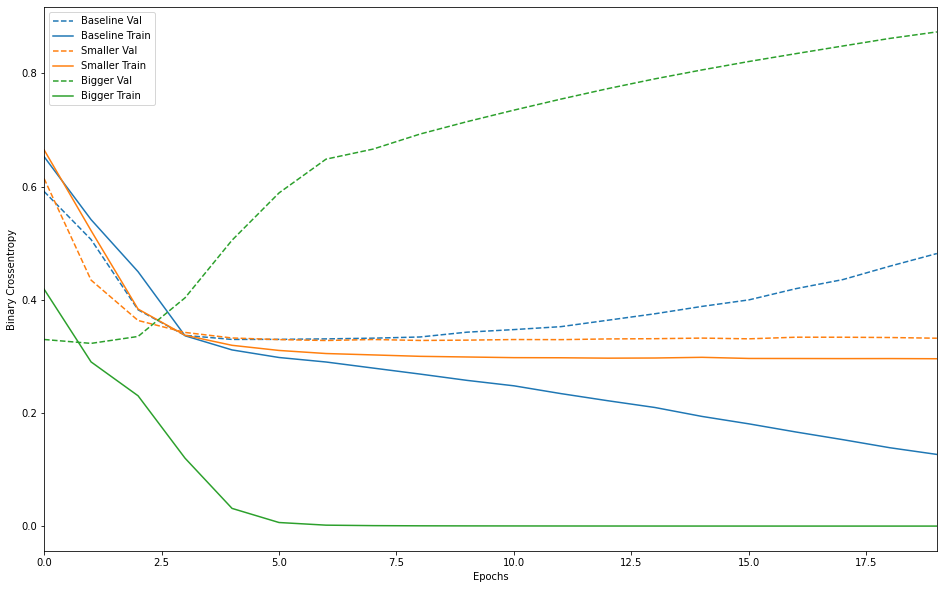

In [20]:
# 큰 네트워크가 심하게 과대적합되는 것을 확인할 수 있음
# 네트워크의 용량이 많을 수록 훈련세트를 더 빠르게 모델링할 수 있음(훈련 손실이 낮아짐) but 더 쉽게 과대적합됨

def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(), label=name.title()+' Train')
        
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()

    plt.xlim([0, max(history.epoch)])
        
plot_history([('baseline', baseline_history), ('smaller', smaller_history), ('bigger', bigger_history)])    

### 과대적합 방지 전략 - 1.가중치 규제
- 오캄의 면도날(Occam's Razor): 어떤 것을 설명하는 방법이 있을 때, 더 정확한 설명은 최소한의 가정과 설명을 내포하는 방법을 택하는 것
- In Model: 훈련 데이터와 네트워크 구조가 주어졌을 때, 데이터를 설명할 수 있는 가장 간단한 가중치의 조합을 선택
    - 간단한 모델: 모델 파라미터의 분포를 봤을 때, 엔트로피(entropy)가 가장 작은 모델 (= 적은 파라미터를 가진 모델)
    
    
- 과대적합을 완화시키는 일반적인 방법: 가중치가 작은 값을 갖도록 네트워크의 복잡도에 제약을 가하는 것
    - 가중치 값의 분포를 좀 더 균일하게 만들어줌 --> 가중치 규제(weight regularization)
    - 네트워크의 손실 함수에 큰 가중치에 해당하는 비용을 추가
    - 비용의 형태
        - L1 규제
            - 가중치의 절댓값에 비례하는 비용이 추가됨 (= 가중치의 L1노름[norm]을 추가)
            - 일부 가중치 파라미터를 0으로 만듦
        - L2 규제: 
            - 가중치의 제곱에 비례하는 비용이 추가됨 (= 가중치의 L2노름[norm]을 추가)
            - 신경망에서 L2 규제를 가중치 감쇠(weight decay)라고 부르기도 함
            - 가중치 파라미터를 제한하지만 완전히 0으로 만들지는 않음 --> L2 규제를 더 많이 사용하는 이유
        

In [22]:
# l2(0.001)는 네트워크의 전체 손실에 층에 있는 가중치 행렬의 모든 값이 0.001 * weight_coefficient_value**2만큼 더해진다는 의미
# 이런 페널티(penalty)는 훈련할 때만 추가됨 --> 테스트 단계보다 훈련 단계에서 네트워크 손실이 훨씬 더 클 것

l2_model = keras.models.Sequential([
    Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu', input_shape=(NUM_WORDS,)),
    Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu'),
    Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 1s - loss: 0.6778 - accuracy: 0.6707 - binary_crossentropy: 0.6375 - val_loss: 0.5567 - val_accuracy: 0.7950 - val_binary_crossentropy: 0.5202
Epoch 2/20
25000/25000 - 0s - loss: 0.4592 - accuracy: 0.8357 - binary_crossentropy: 0.4226 - val_loss: 0.4074 - val_accuracy: 0.8495 - val_binary_crossentropy: 0.3703
Epoch 3/20
25000/25000 - 0s - loss: 0.3766 - accuracy: 0.8640 - binary_crossentropy: 0.3395 - val_loss: 0.3762 - val_accuracy: 0.8583 - val_binary_crossentropy: 0.3395
Epoch 4/20
25000/25000 - 0s - loss: 0.3536 - accuracy: 0.8705 - binary_crossentropy: 0.3175 - val_loss: 0.3672 - val_accuracy: 0.8613 - val_binary_crossentropy: 0.3319
Epoch 5/20
25000/25000 - 0s - loss: 0.3451 - accuracy: 0.8734 - binary_crossentropy: 0.3105 - val_loss: 0.3630 - val_accuracy: 0.8614 - val_binary_crossentropy: 0.3291
Epoch 6/20
25000/25000 - 0s - loss: 0.3397 - accuracy: 0.8752 - binary_crossentropy: 0.3065 - val_loss: 0.3625

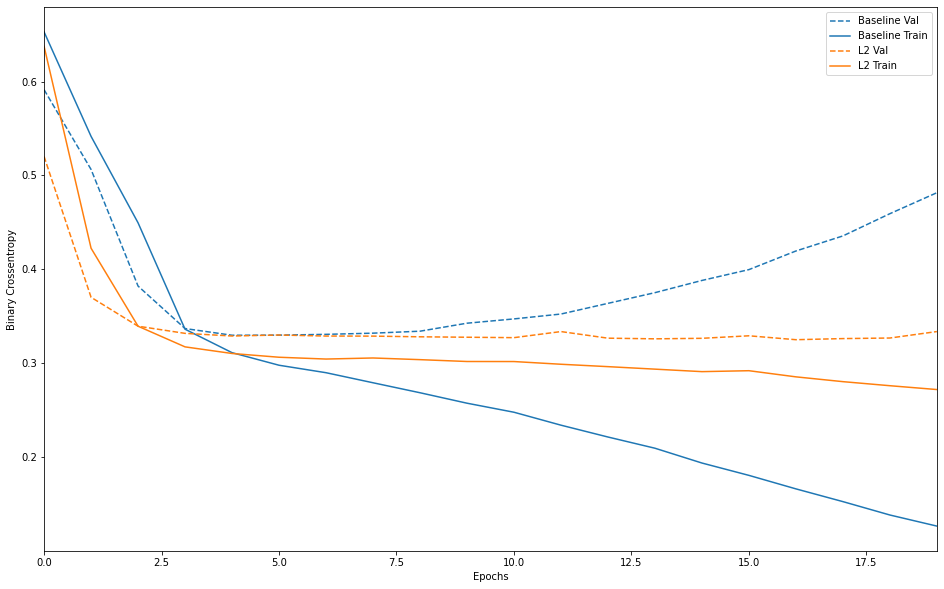

In [23]:
# L2 규제의 효과
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

### 드롭아웃(dropout)
- 신경망에서 가장 효과적이고 널리 사용하는 규제 기법 중 하나
- 층에 적용하면 훈련하는 동안 층의 출력 특성을 랜덤하게 끔 (= 0으로 만듦)
- 드롭아웃 비율: 0이 되는 특성의 비율 (보통 0.2~0.5 사용)

In [24]:
dpt_model = keras.models.Sequential([
    Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 1s - loss: 0.6804 - accuracy: 0.5600 - binary_crossentropy: 0.6804 - val_loss: 0.6000 - val_accuracy: 0.7450 - val_binary_crossentropy: 0.6000
Epoch 2/20
25000/25000 - 0s - loss: 0.5756 - accuracy: 0.6975 - binary_crossentropy: 0.5756 - val_loss: 0.4497 - val_accuracy: 0.8248 - val_binary_crossentropy: 0.4497
Epoch 3/20
25000/25000 - 0s - loss: 0.4945 - accuracy: 0.7690 - binary_crossentropy: 0.4945 - val_loss: 0.3840 - val_accuracy: 0.8441 - val_binary_crossentropy: 0.3840
Epoch 4/20
25000/25000 - 0s - loss: 0.4425 - accuracy: 0.8072 - binary_crossentropy: 0.4425 - val_loss: 0.3517 - val_accuracy: 0.8529 - val_binary_crossentropy: 0.3517
Epoch 5/20
25000/25000 - 0s - loss: 0.4118 - accuracy: 0.8290 - binary_crossentropy: 0.4118 - val_loss: 0.3364 - val_accuracy: 0.8587 - val_binary_crossentropy: 0.3364
Epoch 6/20
25000/25000 - 0s - loss: 0.3886 - accuracy: 0.8429 - binary_crossentropy: 0.3886 - val_loss: 0.3328

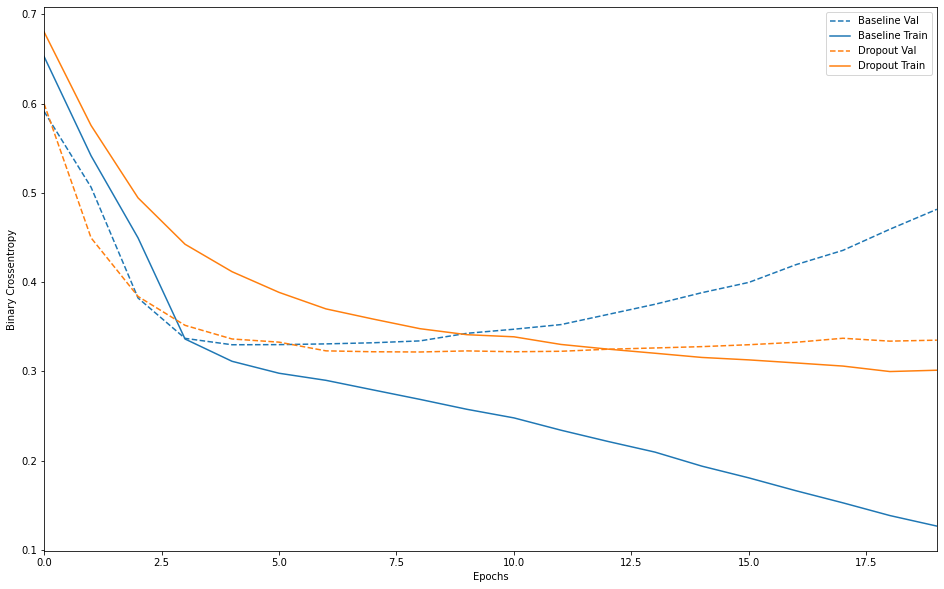

In [25]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

### 정리
- 신경망에서 과대적합을 방지하기 위해 많이 사용하는 방법
    1. 더 많은 훈련데이터 사용
    2. 네트워크 용량을 줄이기
    3. 가중치 규제를 추가
    4. 드롭아웃을 추가
    5. 데이터 증식(data-augmentation) *
    6. 배치 정규화(batch normalization) *